In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 100)

In [3]:
calender=pd.read_csv('calendar2.csv')
data1=pd.read_csv('listings.csv')
data2=pd.read_csv('listings2.csv')
data3=pd.read_csv('reviews2.csv')

In [4]:
sentiment=pd.read_csv('sentiment.csv')
sentiment=sentiment.drop(['Unnamed: 0','sentiment'],axis=1)

for the unsupervied method, I will use K Means instead DBSCAN and HDBSCAN because it's easier to inteprete the cluster and don't cluster the outlier (I will remove the outlier by myself). I've tried the DBSCAN and HDBSCAN before, but the result was not good enough and uninterpretable

# Data Preparation

For this section, I do the same thing like I do in Data Preparation + EDA notebook. just to make sure the data is same

In [5]:
data_sort=data2[['id','host_is_superhost','property_type','bedrooms','beds','guests_included','review_scores_rating','instant_bookable','bathrooms','security_deposit','cleaning_fee','amenities']]

In [6]:
df_price=pd.merge(data1, data_sort,on='id')

In [7]:
df_price=pd.merge(df_price, sentiment, how='left')

In [8]:
df_price=df_price.drop(['host_id','last_review','name'],axis=1)

In [9]:
df_price['len_amenities']=df_price['amenities'].apply(lambda x:len(x.split(','))-1)

In [10]:
df_price=df_price.drop('amenities', axis=1)

In [11]:
price_clean=df_price[df_price['price']>0]

In [12]:
price_clean['review_scores_rating']=price_clean['review_scores_rating'].fillna(value=0)
price_clean['mean']=price_clean['mean'].fillna(value=0)
price_clean['reviews_per_month']=price_clean['reviews_per_month'].fillna(value=0)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

In [13]:
price_clean['security_deposit']=price_clean['security_deposit'].fillna(value='$0')
price_clean['cleaning_fee']=price_clean['cleaning_fee'].fillna(value='$0')


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
import re
def remove_prefix(col):
    clean=re.sub("[$]", "", col)
    return clean

In [15]:
def remove_comma(col):
    clean=re.sub(',','',col)
    return clean

In [16]:
price_clean['security_deposit']=price_clean['security_deposit'].apply(remove_prefix)
price_clean['cleaning_fee']=price_clean['cleaning_fee'].apply(remove_prefix)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
price_clean['security_deposit']=price_clean['security_deposit'].apply(remove_comma)


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
price_clean[price_clean['cleaning_fee'].str.contains(',')]

,id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,bedrooms,beds,guests_included,review_scores_rating,instant_bookable,bathrooms,security_deposit,cleaning_fee,mean,len_amenities


In [19]:
price_clean['security_deposit']=price_clean['security_deposit'].astype(float)
price_clean['cleaning_fee']=price_clean['cleaning_fee'].astype(float)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
price_clean=price_clean.dropna()

In [21]:
price_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7654 entries, 0 to 7674
Data columns (total 25 columns):
id                                7654 non-null int64
host_name                         7654 non-null object
neighbourhood_group               7654 non-null object
neighbourhood                     7654 non-null object
latitude                          7654 non-null float64
longitude                         7654 non-null float64
room_type                         7654 non-null object
price                             7654 non-null int64
minimum_nights                    7654 non-null int64
number_of_reviews                 7654 non-null int64
reviews_per_month                 7654 non-null float64
calculated_host_listings_count    7654 non-null int64
availability_365                  7654 non-null int64
host_is_superhost                 7654 non-null object
property_type                     7654 non-null object
bedrooms                          7654 non-null float64
beds           

In [22]:
IQR=price_clean.describe()['price'].loc['75%']-price_clean.describe()['price'].loc['25%']
lower_limit=price_clean.describe()['price'].loc['25%']-1.5*IQR
upper_limit=price_clean.describe()['price'].loc['75%']+1.5*IQR

In [23]:
price_clean=price_clean[(price_clean['price']>lower_limit) & (price_clean['price']<upper_limit)]

In [24]:
price_clean=price_clean[price_clean['minimum_nights']<=365]

In [25]:
price_clean=price_clean[price_clean['bedrooms']<=10]

In [26]:
def is_cheap_dorm(col):
    if (col['price']<=100) and (col['beds']>=3):
        return 1
    else:
        return 0

In [27]:
price_clean['is_cheap_dorm']=price_clean[['beds','price']].apply(is_cheap_dorm,axis=1)

In [28]:
price_clean[price_clean['is_cheap_dorm']==1]

,id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,beds,guests_included,review_scores_rating,instant_bookable,bathrooms,security_deposit,cleaning_fee,mean,len_amenities,is_cheap_dorm
84,1562453,Domus,Central Region,Novena,1.32359,103.84980,Private room,30,108,0,...,4.0,1,0.0,f,1.0,0.0,0.0,0.000000,4,1
94,1654840,Superb Hostel,Central Region,Rochor,1.30292,103.85800,Private room,89,1,2,...,3.0,3,80.0,f,8.0,0.0,0.0,0.283333,1,1
109,1813277,Skye,West Region,Choa Chu Kang,1.38717,103.74256,Private room,61,183,0,...,3.0,1,0.0,f,2.0,0.0,0.0,0.000000,11,1
123,2024941,Jimmy,East Region,Bedok,1.31963,103.92400,Private room,95,3,0,...,4.0,1,0.0,t,4.0,200.0,30.0,0.000000,2,1
178,3000736,Chloe,Central Region,Kallang,1.31047,103.86096,Shared room,34,1,19,...,16.0,1,91.0,f,2.0,0.0,0.0,0.403502,18,1
188,3179080,Chloe,Central Region,Kallang,1.31086,103.85883,Shared room,37,1,18,...,12.0,1,96.0,f,2.0,0.0,0.0,0.298024,20,1
206,3479446,Royal,Central Region,Outram,1.28318,103.84335,Hotel room,30,1,138,...,10.0,1,89.0,t,4.0,0.0,0.0,0.338023,23,1
207,3479493,Royal,Central Region,Outram,1.28458,103.84298,Hotel room,30,1,80,...,16.0,1,88.0,t,4.0,0.0,0.0,0.271283,21,1
212,3639516,Royal,Central Region,Outram,1.28496,103.84318,Hotel room,30,1,192,...,16.0,1,89.0,t,4.0,0.0,0.0,0.297918,21,1
213,3651408,Royal,Central Region,Outram,1.28439,103.84308,Hotel room,30,1,177,...,16.0,1,88.0,t,4.0,0.0,0.0,0.340251,20,1


In [29]:
price_clean['is_cheap_dorm'].value_counts()

0    7122
1     228
Name: is_cheap_dorm, dtype: int64

In [30]:
price_clean=price_clean[price_clean['guests_included']<=10]

# Hotel Clustering

In [31]:
price_clean.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,bedrooms,beds,guests_included,review_scores_rating,bathrooms,security_deposit,cleaning_fee,mean,len_amenities,is_cheap_dorm
count,7.348000e+03,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000
mean,2.347009e+07,1.314721,103.848960,135.348530,18.448013,13.523272,0.690795,39.731083,207.707267,1.272999,1.888949,1.924333,58.430593,1.516195,172.572128,28.621938,0.208622,20.770822,0.031029
std,1.034536e+07,0.030261,0.044058,87.093962,39.896724,30.624108,1.166574,66.124091,145.824110,0.841968,2.059063,1.462658,44.340648,1.150099,361.961284,38.926062,0.199331,10.178080,0.173407
min,4.909100e+04,1.242790,103.665470,14.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,1.574610e+07,1.296680,103.836870,63.000000,2.000000,0.000000,0.000000,2.000000,59.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,14.000000,0.000000
50%,2.452710e+07,1.311315,103.849950,118.000000,3.000000,2.000000,0.180000,9.000000,267.000000,1.000000,1.000000,1.000000,86.000000,1.000000,0.000000,20.000000,0.247694,19.000000,0.000000
75%,3.253786e+07,1.322573,103.876028,184.000000,14.000000,11.000000,0.860000,46.000000,355.000000,2.000000,2.000000,2.000000,96.000000,2.000000,250.000000,49.000000,0.352553,27.000000,0.000000
max,3.889002e+07,1.454590,103.973420,401.000000,365.000000,331.000000,16.110000,285.000000,365.000000,10.000000,36.000000,10.000000,100.000000,21.000000,6500.000000,822.000000,1.000000,72.000000,1.000000


In [32]:
df_clustering=price_clean[['id','bedrooms','guests_included','price','is_cheap_dorm']]

In [33]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7348 entries, 0 to 7674
Data columns (total 5 columns):
id                 7348 non-null int64
bedrooms           7348 non-null float64
guests_included    7348 non-null int64
price              7348 non-null int64
is_cheap_dorm      7348 non-null int64
dtypes: float64(1), int64(4)
memory usage: 344.4 KB


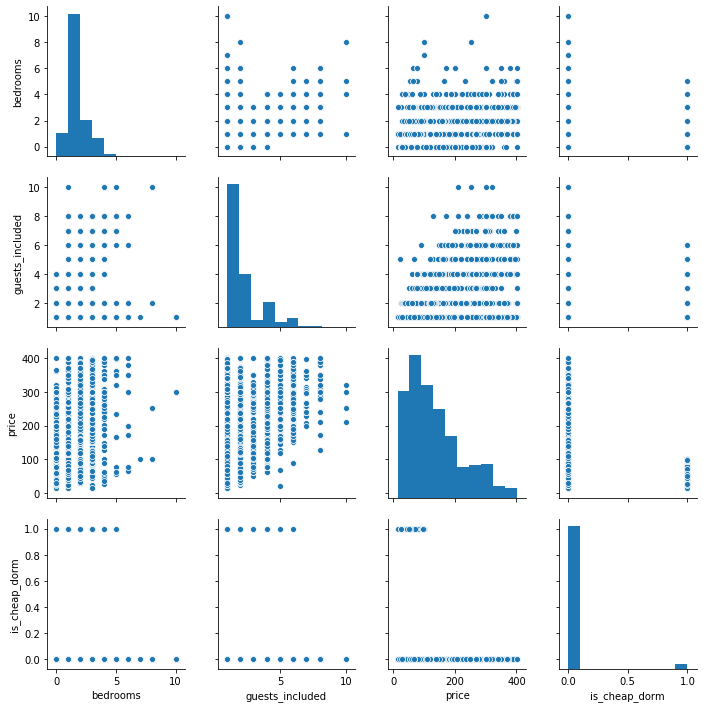

In [34]:
sns.pairplot(df_clustering.drop('id',axis=1))

## Scaler

The KMeans Method is based on distance, so scaling is really important

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [36]:
scaler=StandardScaler()

In [37]:
data_scaled=scaler.fit_transform(df_clustering.drop('id',axis=1))

In [38]:
data_scaled=pd.DataFrame(data_scaled)

In [39]:
from sklearn.cluster import KMeans

## Check the n value

### Elbow method

In [40]:
inertia_list=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data_scaled)
    inertia_list.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

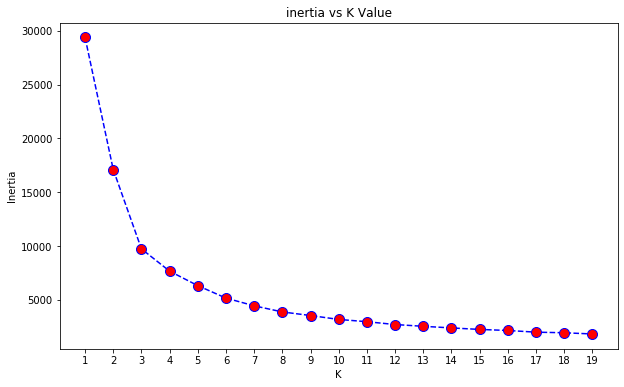

In [41]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20), inertia_list, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('inertia vs K Value')
plt.xticks(range(1,20,1))
plt.xlabel('K')
plt.ylabel('Inertia')

### Silihouette score

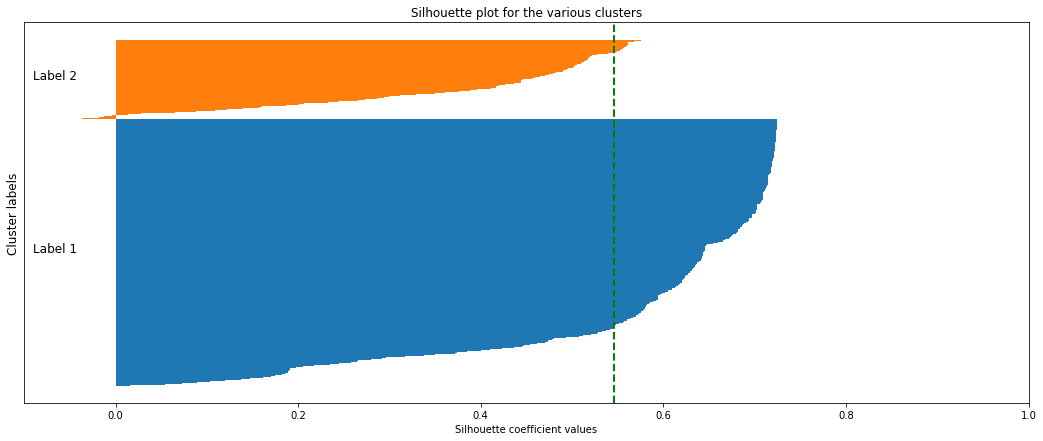

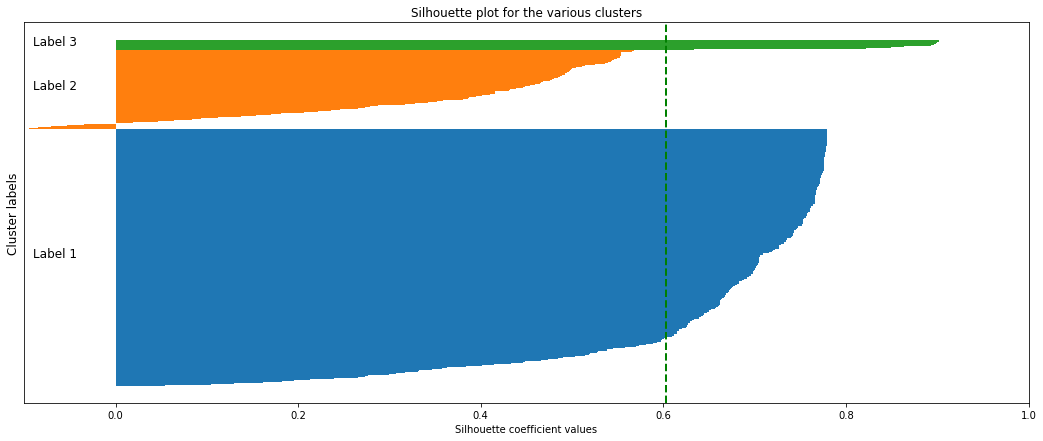

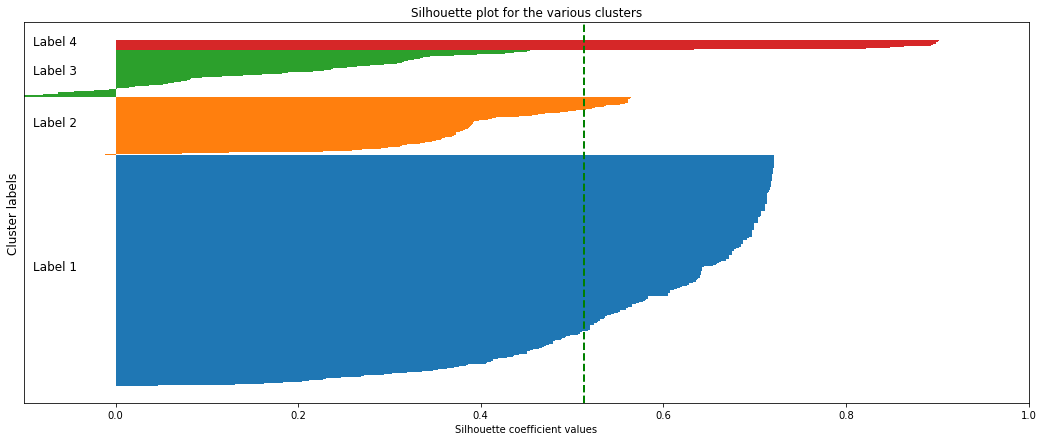

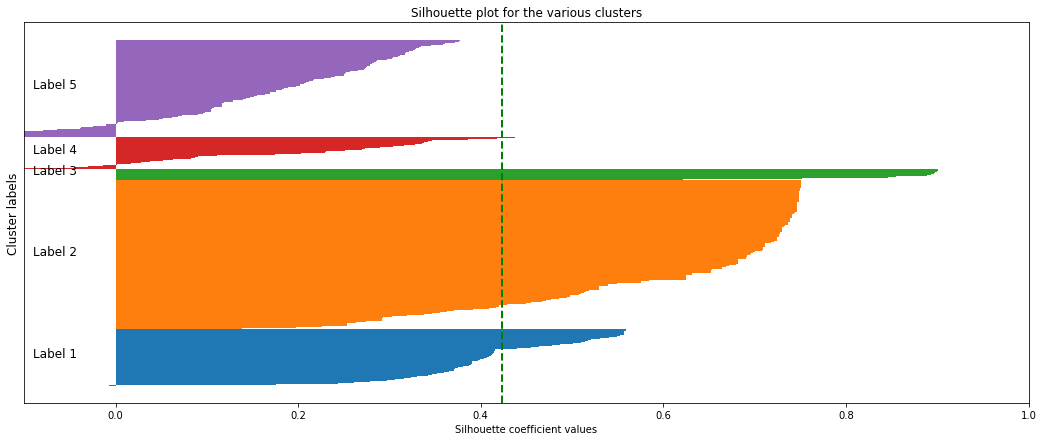

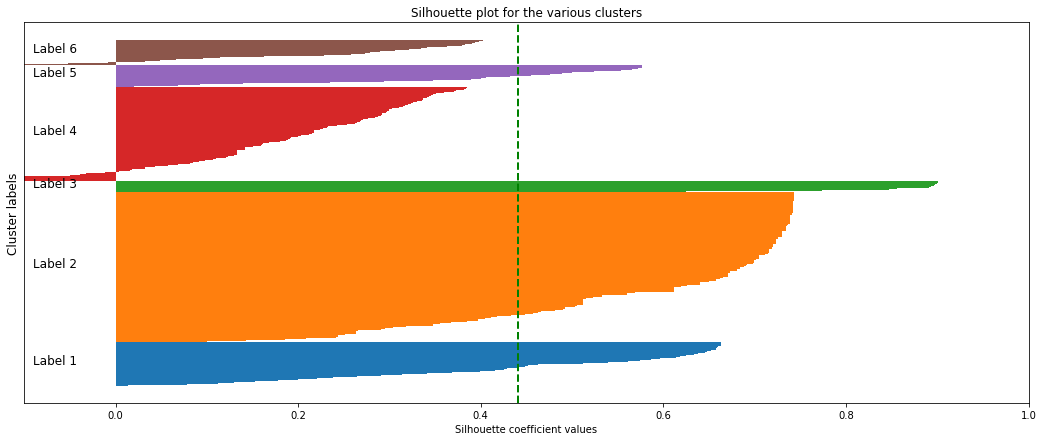

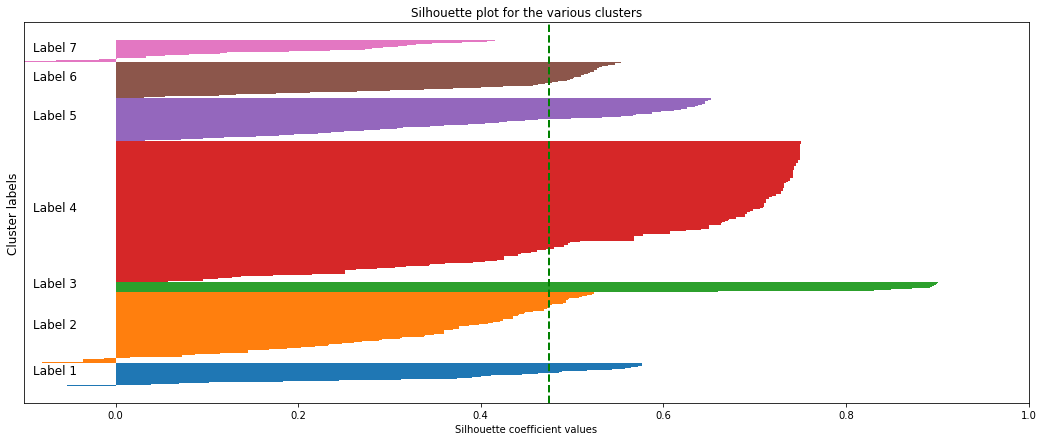

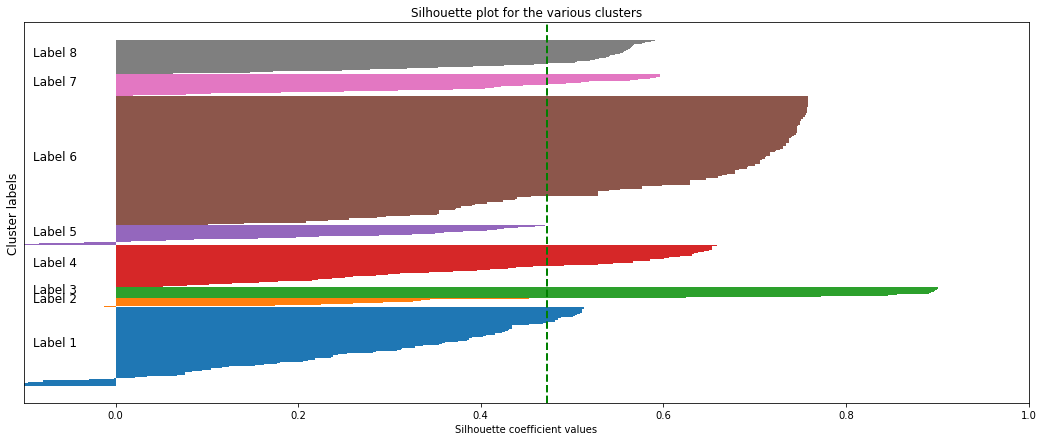

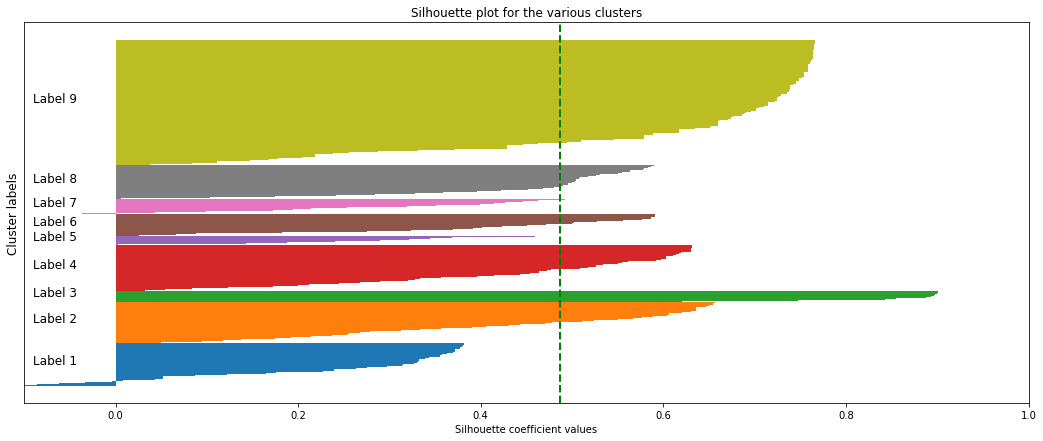

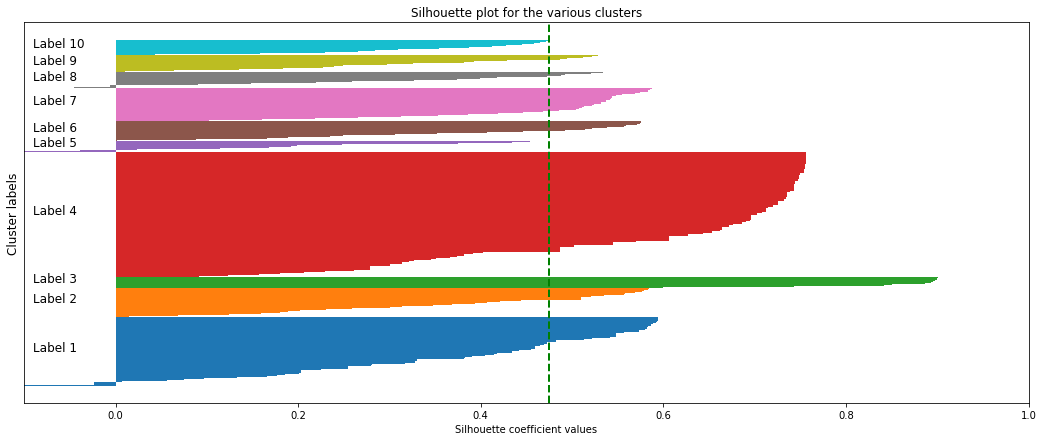

In [42]:
from sklearn.metrics import silhouette_samples

for i, k in enumerate(list(range(2,11))):
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(data_scaled)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(data_scaled, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.09, (y_lower + y_upper) / 2, 'Label '+str(i + 1), fontsize = 12)
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels', fontsize = 12)
    ax1.set_title('Silhouette plot for the various clusters');


based from the method above, I decided to take 7 as K value

## CLustering 1

In [43]:
kmeans = KMeans(n_clusters=7)

In [44]:
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
df_clustering['label kmeans2']=kmeans.labels_

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


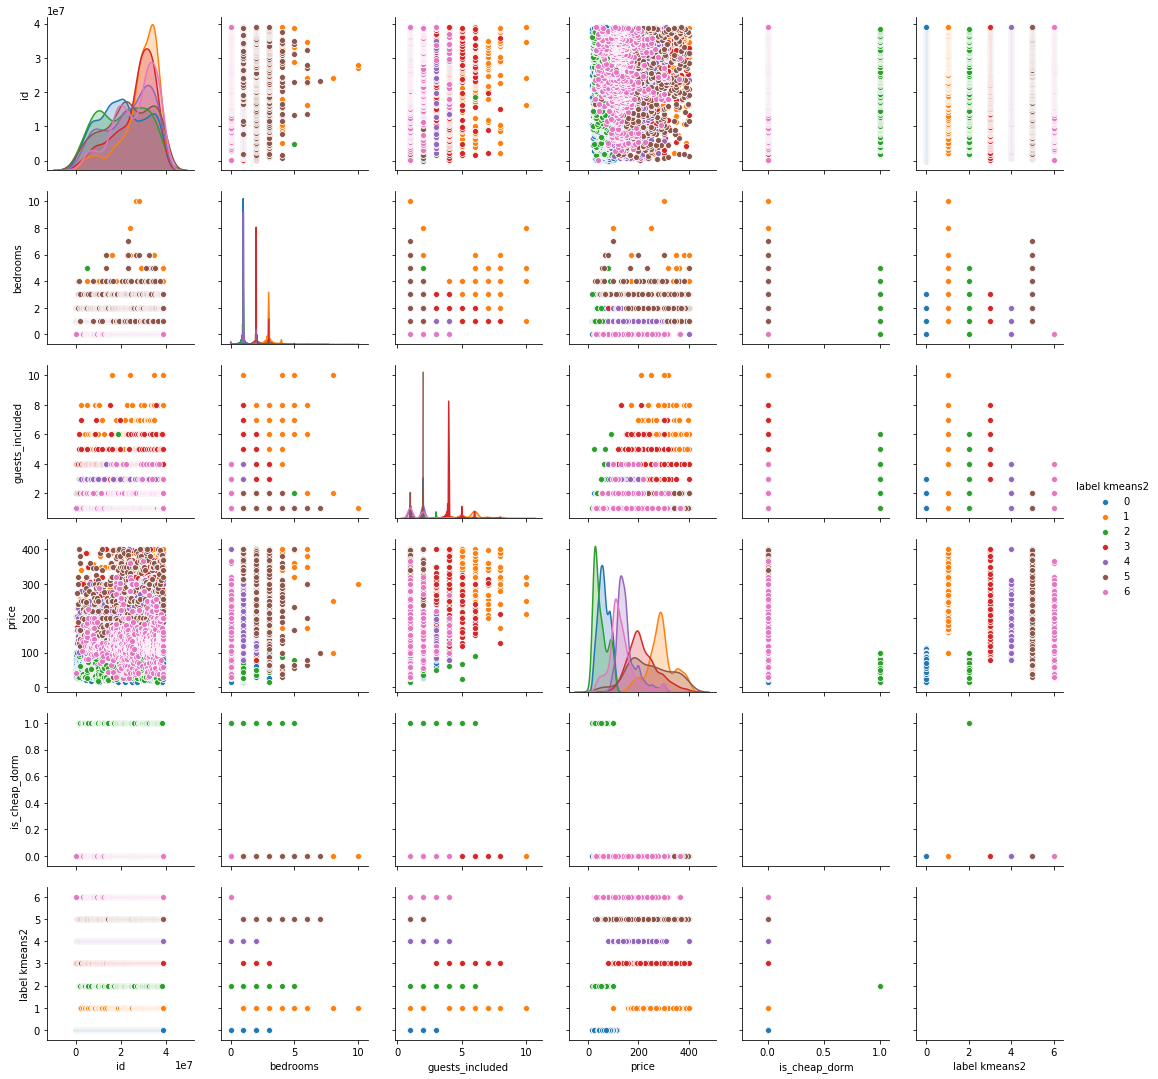

In [46]:
sns.pairplot(df_clustering, hue='label kmeans2')

From the pairplot above, some strange pattern is spotted. let's take a look at label 5 which has more beds than the guest included. I'll check the data deeper.

### Extra work

In [48]:
tes_label=pd.concat((price_clean, df_clustering['label kmeans2'],),axis=1)

In [49]:
nama=data2[['id','name','description']]
tes_label=pd.merge(tes_label, nama, on='id', how='left')

In [50]:
tes_label[tes_label['label kmeans2']==5][['id','name','property_type','price','len_amenities','description','guests_included','beds','bedrooms']]

,id,name,property_type,price,len_amenities,description,guests_included,beds,bedrooms
23,604966,Boutique 1 bedroom entiere appart,Apartment,274,23,"A lovely, elegant and fully equipped nest for ...",1,1.0,2.0
37,819034,Boutique 2 Bedroom Apartment,Apartment,300,21,"Perfect sharing space. 2 bedrooms, each have t...",1,2.0,2.0
45,888196,Exclusive 4 BR Penthouse with Views,Apartment,241,24,Family home with modern amenities & chock full...,2,4.0,4.0
48,922138,Porcelain Bowl Theme - 2 BR Apt,Condominium,240,19,This property complies with all applicable gov...,1,2.0,2.0
60,1199033,Lush Apartment on the East Coast,Condominium,190,47,Stay next to the East Coast Park - enjoying th...,1,2.0,2.0
61,1210268,3BR (For 5)Apt Orchard/Stevens/UNESCO *MRT* Sui,Serviced apartment,319,49,"Fully furnished with TV, 90+ Cable TV channels...",1,4.0,3.0
63,1233249,2BR (For 3) Apt Orchard/Stevens/UNESCO *MRT* A,Serviced apartment,240,50,"Fully furnished with TV, 90+ Cable TV channels...",1,2.0,2.0
73,1434208,Appt 3R great vew on Marin baysand,Apartment,401,20,Marvelous view on marina bay sand for this 3 b...,1,5.0,3.0
79,1581224,Life Impact Coaching,Townhouse,129,22,An old-world sanctuary about 5 mins walk from ...,2,12.0,4.0
100,1805143,2 Bdr condo+pool+Mins walk to MRT,Apartment,167,46,"Cosy 2 bedroom,1 toilet fully Furnished high f...",2,3.0,2.0


based on the table above, we can see the inconsistent from name and guest included. for example, in the properties's name is written '2BR (For 3) Apt Orchard/Stevens/UNESCO *MRT* A' but at guest included is written '1'. let's fix this data

In [51]:
trouble=tes_label[tes_label['label kmeans2']==5][['id','name','property_type','price','len_amenities','description','guests_included','beds','bedrooms']]

In [52]:
trouble

,id,name,property_type,price,len_amenities,description,guests_included,beds,bedrooms
23,604966,Boutique 1 bedroom entiere appart,Apartment,274,23,"A lovely, elegant and fully equipped nest for ...",1,1.0,2.0
37,819034,Boutique 2 Bedroom Apartment,Apartment,300,21,"Perfect sharing space. 2 bedrooms, each have t...",1,2.0,2.0
45,888196,Exclusive 4 BR Penthouse with Views,Apartment,241,24,Family home with modern amenities & chock full...,2,4.0,4.0
48,922138,Porcelain Bowl Theme - 2 BR Apt,Condominium,240,19,This property complies with all applicable gov...,1,2.0,2.0
60,1199033,Lush Apartment on the East Coast,Condominium,190,47,Stay next to the East Coast Park - enjoying th...,1,2.0,2.0
61,1210268,3BR (For 5)Apt Orchard/Stevens/UNESCO *MRT* Sui,Serviced apartment,319,49,"Fully furnished with TV, 90+ Cable TV channels...",1,4.0,3.0
63,1233249,2BR (For 3) Apt Orchard/Stevens/UNESCO *MRT* A,Serviced apartment,240,50,"Fully furnished with TV, 90+ Cable TV channels...",1,2.0,2.0
73,1434208,Appt 3R great vew on Marin baysand,Apartment,401,20,Marvelous view on marina bay sand for this 3 b...,1,5.0,3.0
79,1581224,Life Impact Coaching,Townhouse,129,22,An old-world sanctuary about 5 mins walk from ...,2,12.0,4.0
100,1805143,2 Bdr condo+pool+Mins walk to MRT,Apartment,167,46,"Cosy 2 bedroom,1 toilet fully Furnished high f...",2,3.0,2.0


In [53]:
trouble.isna().sum()

id                  0
name                0
property_type       0
price               0
len_amenities       0
description        23
guests_included     0
beds                0
bedrooms            0
dtype: int64

I will fix the guest included data based on number of beds and bedroom. I will take the higher value from beds and bedroom and replace the old guest inluded data. This is not the perfect method, but the fastest and good enough

In [54]:
def fix_guest(col):
    if col['beds']>=col['bedrooms']:
        return int(col['beds'])
    else:
        return int(col['bedrooms'])

In [55]:
trouble['guests_included']=trouble[['beds','bedrooms']].apply(fix_guest,axis=1)

In [56]:
trouble=trouble[['id','guests_included']]

In [57]:
trouble

,id,guests_included
23,604966,2
37,819034,2
45,888196,4
48,922138,2
60,1199033,2
61,1210268,4
63,1233249,2
73,1434208,5
79,1581224,12
100,1805143,3


In [58]:
trouble.set_index('id', inplace=True)

In [59]:
df_clustering.set_index('id', inplace=True)

In [60]:
fixed_clustering=df_clustering.copy()

In [61]:
fixed_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7348 entries, 49091 to 38890018
Data columns (total 5 columns):
bedrooms           7348 non-null float64
guests_included    7348 non-null int64
price              7348 non-null int64
is_cheap_dorm      7348 non-null int64
label kmeans2      7348 non-null int32
dtypes: float64(1), int32(1), int64(3)
memory usage: 315.7 KB


In [62]:
fixed_clustering.update(trouble)

In [63]:
df_clustering['guests_included'].value_counts()

1     4281
2     1591
4      765
6      277
3      206
5      151
7       42
8       31
10       4
Name: guests_included, dtype: int64

In [64]:
fixed_clustering['guests_included'].value_counts()

1.0     3873
2.0     1762
4.0      827
3.0      326
6.0      297
5.0      175
7.0       45
8.0       33
10.0       6
14.0       3
12.0       1
Name: guests_included, dtype: int64

In [65]:
fixed_clustering.reset_index(inplace=True)

In [66]:
df_clustering.reset_index(inplace=True)

## Clustering 2

The data is clean enough so let's do clusteirng again

In [67]:
scaler=StandardScaler()

In [68]:
data_scaled=scaler.fit_transform(fixed_clustering.drop('id',axis=1))

In [69]:
data_scaled=pd.DataFrame(data_scaled)

##### n Value

In [70]:
inertia_list=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data_scaled)
    inertia_list.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

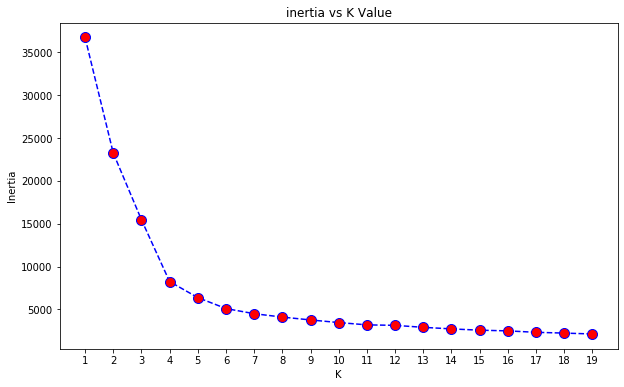

In [71]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20), inertia_list, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('inertia vs K Value')
plt.xticks(range(1,20,1))
plt.xlabel('K')
plt.ylabel('Inertia')

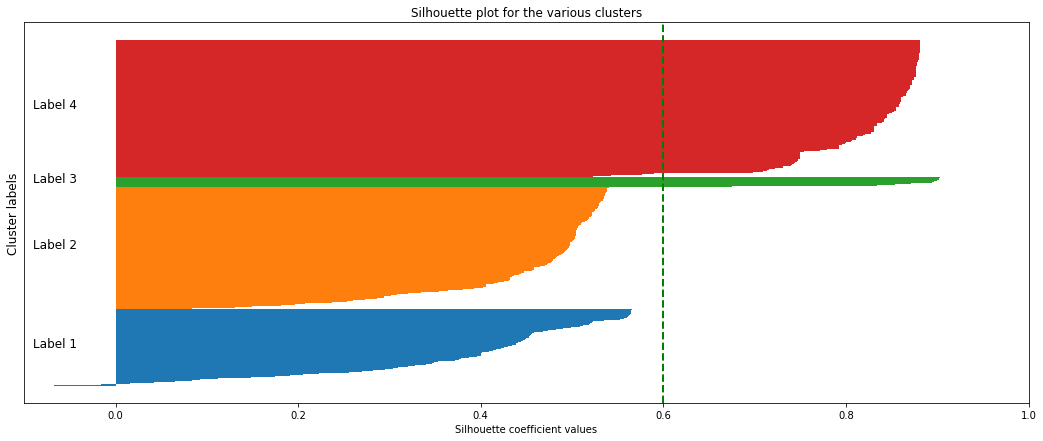

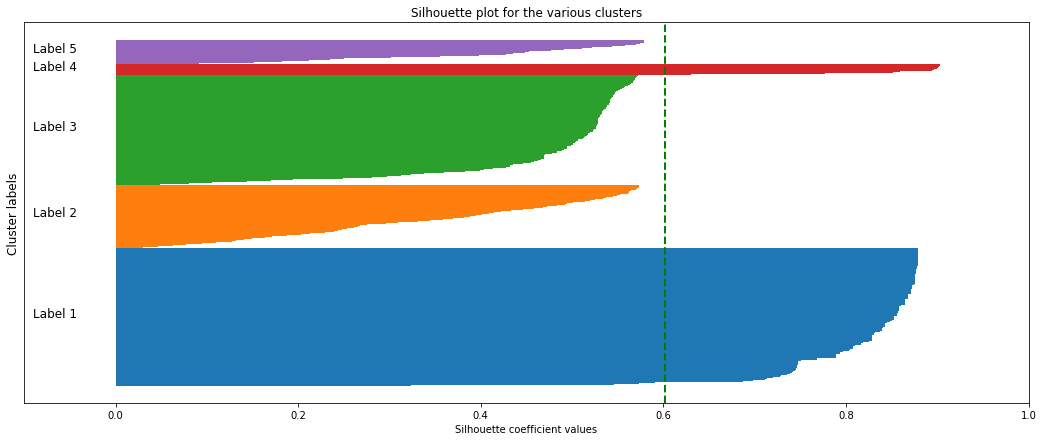

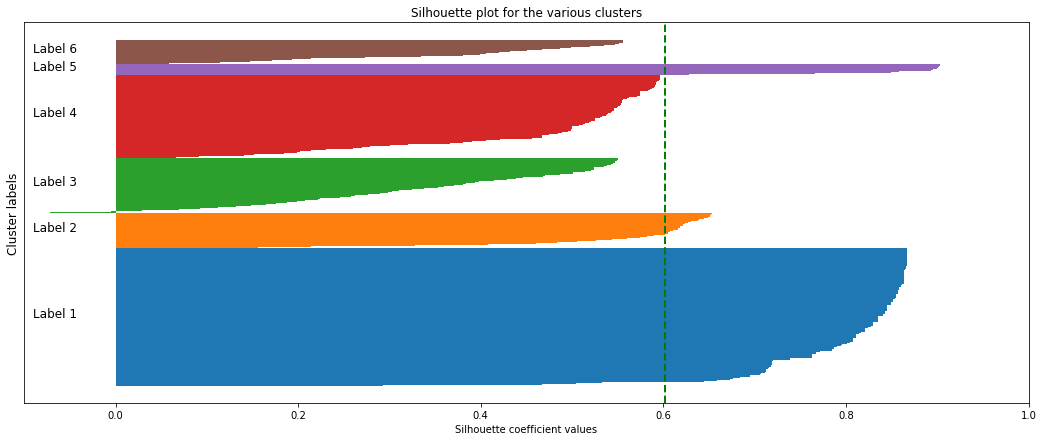

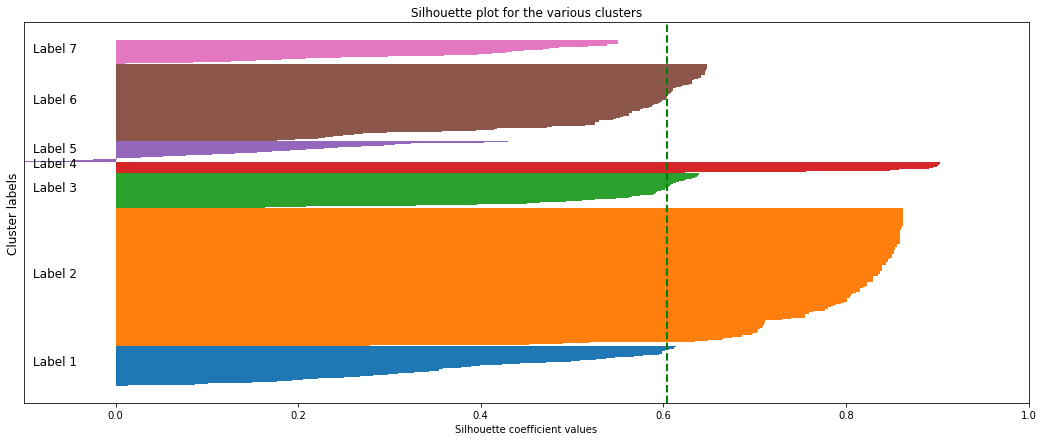

In [72]:
from sklearn.metrics import silhouette_samples

for i, k in enumerate(list(range(4,8))):
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(data_scaled)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(data_scaled, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.09, (y_lower + y_upper) / 2, 'Label '+str(i + 1), fontsize = 12)
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels', fontsize = 12)
    ax1.set_title('Silhouette plot for the various clusters');


based on the data above, I will choose 6 as K value

##### Clustering

In [73]:
kmeans = KMeans(n_clusters=6)

In [74]:
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [75]:
fixed_clustering['label kmeans final']=kmeans.labels_

C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


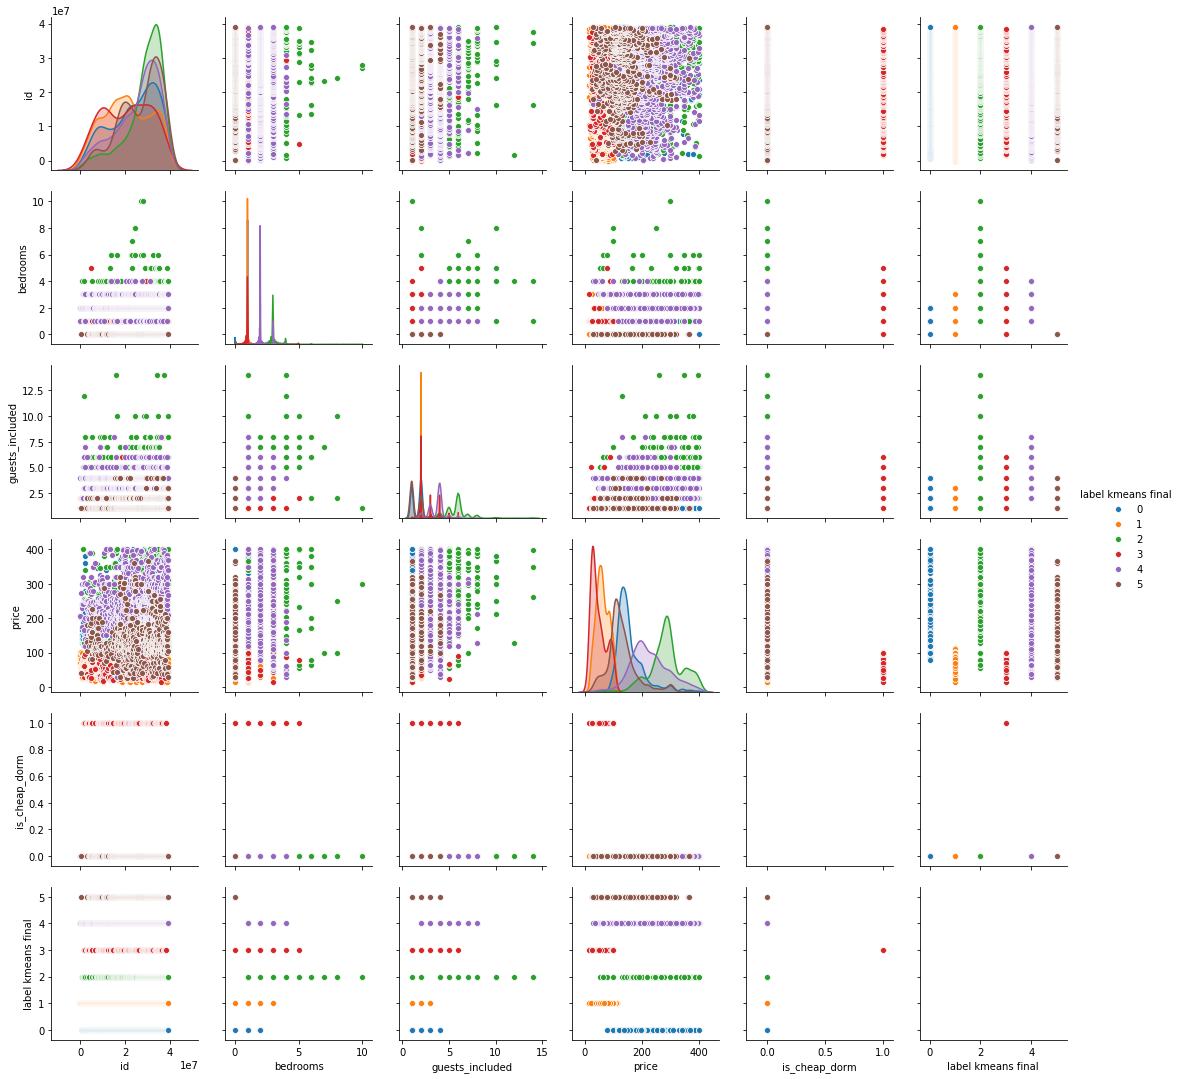

In [76]:
sns.pairplot(fixed_clustering.drop('label kmeans2',axis=1), hue='label kmeans final')

the explanation about this cluster will be discussed at Data Preparation + EDA notebook

In [78]:
df_label=fixed_clustering[['id','label kmeans final']]

## Finish

In [112]:
df_id_cluster=fixed_clustering[['id','label kmeans final','guests_included']]

In [113]:
df_id_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7348 entries, 0 to 7347
Data columns (total 3 columns):
id                    7348 non-null int64
label kmeans final    7348 non-null int32
guests_included       7348 non-null float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 143.6 KB


In [114]:
df_id_cluster.to_csv('labelling')